# **Import Libraries**

In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **Load and Explore Data**

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/EnvyNerd/RigvisionX-Project/refs/heads/main/train_reservoir_data.csv")
df 


,Production Rate,Permeability,Well Depth,Porosity,Temperature,Pressure
0,-1.519930,1.102226,0.522388,0.495579,-0.466154,0.809276
1,1.556585,-1.318745,1.141845,-1.259651,0.327511,0.785799
2,0.412216,-1.502669,0.057229,-1.607395,1.345847,-0.217153
3,-1.580437,-0.328680,-0.698175,-0.008873,0.645214,-0.432625
4,1.454117,-1.297482,1.689503,1.544215,-0.407240,1.572992
...,...,...,...,...,...,...
795,-0.273548,-0.379311,1.221130,0.813955,1.643713,0.894553
796,1.092857,0.643618,-1.370538,-0.828028,0.539512,-1.748386
797,0.976985,0.922568,1.254143,1.132532,0.458122,0.791466
798,0.721640,-1.633467,-0.388684,-0.353225,-0.744784,-0.165610


## **Featured Selection**

In [7]:
X = df.drop(columns=["Production Rate"])
y = df["Production Rate"]

# **Train-test split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train XGBoost Model**

In [9]:
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# **Evaluate Model**

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.38
R² Score: 0.63


# **Plot Predictions vs Actual**

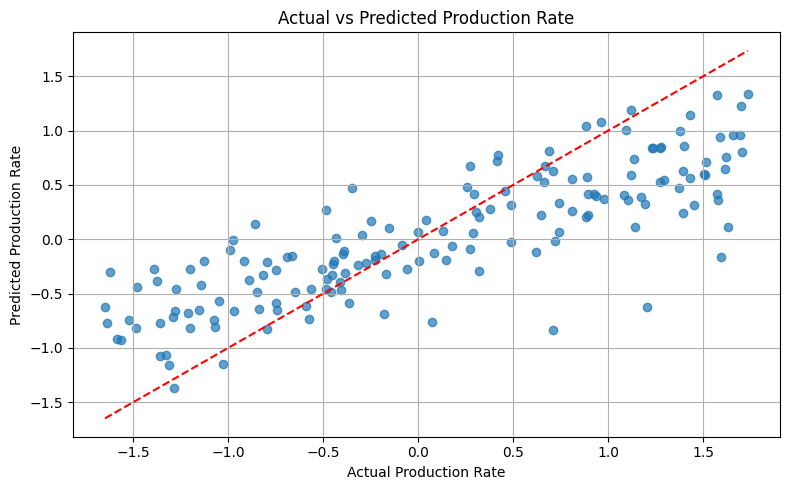

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Production Rate")
plt.ylabel("Predicted Production Rate")
plt.title("Actual vs Predicted Production Rate")
plt.grid(True)
plt.tight_layout()
plt.show() 

# **Define parameter grid**

In [16]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2]
}

# **Create the base model**

In [17]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# **Set up GridSearchCV**

In [18]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

# **Run the grid search**

In [19]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

# **Best model**

In [20]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


# **Save Model**

In [21]:
joblib.dump(model, "rigvisionx_xgb_model.pkl") 

['rigvisionx_xgb_model.pkl']